In [50]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = {}
for i in range(25):
    data[f'df{i}'] = pd.read_csv(f'~/git_env/research/oshea/trident_modifications/testing_mods/SolAb/test_sal/abundance_test3/data/data_row{i}_.csv', delim_whitespace=True)

In [168]:
df1
# x="O VI"
ion_list = ['Ne VIII', 'Mg X', 'O VI', 'S IV', 'Si III', 'C II', 'N I']
ray_index = df1[df1['lightray_index'] == 62]
if x in df1['name'].tolist() and x in ray_index['name'].tolist():
    print(x)

O VI


In [170]:
df1 = data['df0']

def what_ions(df, ion_list, ray_index):
    """
    determines what ions are returned in handy dandy dataframe from salsa 
    
    :ion_list: list of ions initially passed to salsa
    
    :ray: lightray index from salsa dataframe
    """
    names = [i if i in df['name'].tolist() and i in ray_index['name'].tolist() for i in ion_list]

#     for i in ion_list:

#         if i in df['name'].tolist():
#             if i in ray_index['name'].tolist():
#                 names.append(i)
#             else:
#                 pass
#         else:
#             pass
    
    return names

# names1 = what_ions(df = df1, ion_list = ['Ne VIII', 'Mg X', 'O VI', 'S IV', 'Si III', 'C II', 'N I'], ray_index = df1[df1['lightray_index'] == 62])
names2 = what_ions(df = df1, ion_list = ['Ne VIII', 'Mg X', 'O VI', 'S IV', 'Si III', 'C II', 'N I'], ray_index = df1[df1['lightray_index'] == 62])


SyntaxError: invalid syntax (<ipython-input-170-b0dd1cd31593>, line 11)

In [136]:
print(names1)
print(names2)

['O VI', 'S IV', 'Si III', 'C II', 'N I']


NameError: name 'names2' is not defined

In [4]:
def pick_intervals(file_dictionary, lightray):
    
    master_df = pd.DataFrame()
    
    for df in file_dictionary:
        obj = file_dictionary[df]
        master_df = master_df.append(obj[obj['lightray_index'] == lightray])
        
    master_df.reset_index(inplace=True)
    
    index_list = []
    
    for index in range(len(master_df)):
        
        magic_start = master_df['interval_start'][index]
        magic_end = master_df['interval_end'][index]

        if index == 0:
            index_list.append([magic_start, magic_end])
        elif [magic_start, magic_end] in index_list:
            pass
        else:
            
            count = 0

            for x in range(len(index_list)):

                if [magic_start, magic_end] in index_list:
                    pass
                
                elif index_list[x][0] == magic_start:
                    if magic_end > index_list[x][1]:
                        index_list[x][1] = magic_end
                    else:
                        count += 1

                elif index_list[x][1] == magic_end:
                    if magic_start < index_list[x][0]:
                        index_list[x][0] = magic_start
                    else:
                        count += 1
  
            if [magic_start, magic_end] not in index_list and count == 0:
                index_list.append([magic_start, magic_end])
            
    return master_df, index_list

In [5]:
master_df, index_list = pick_intervals(data, 62)
index_list

[[102, 132.0],
 [178, 215.0],
 [373, 384.0],
 [351, 365.0],
 [215, 219.0],
 [232, 357.0],
 [258, 283.0],
 [284, 357.0],
 [357, 365.0],
 [234, 264.0],
 [266, 270.0],
 [273, 276.0],
 [277, 279.0]]

interval: [102, 132.0], Counter({'O VI': 25})


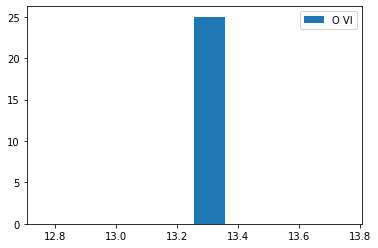

interval: [178, 215.0], Counter({'O VI': 25})


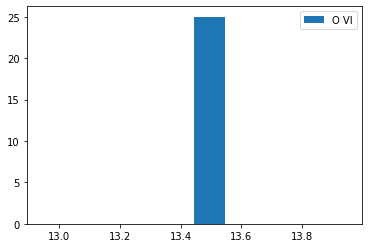

interval: [373, 384.0], Counter({'O VI': 25})


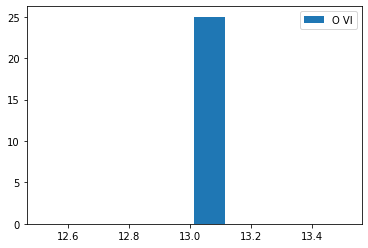

interval: [351, 365.0], Counter({'C II': 50, 'S IV': 25, 'Si III': 25})


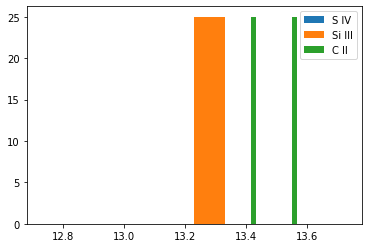

interval: [215, 219.0], Counter({'Si III': 25, 'C II': 25})


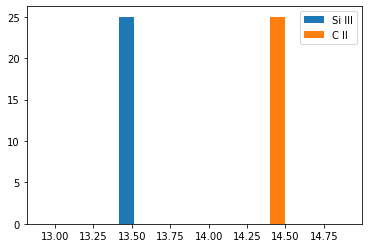

interval: [232, 357.0], Counter({'N I': 100, 'Si III': 75, 'C II': 25})


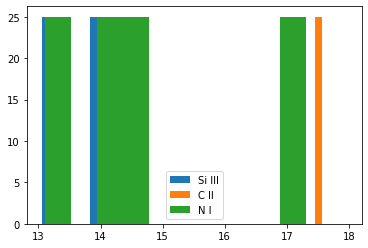

interval: [258, 283.0], Counter({'N I': 75, 'Si III': 25})


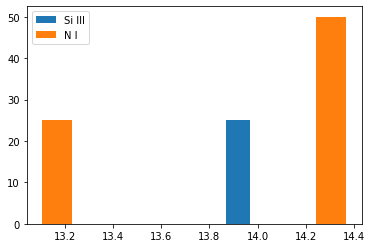

interval: [284, 357.0], Counter({'Si III': 25})


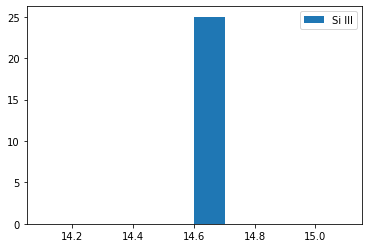

interval: [357, 365.0], Counter({'C II': 50, 'Si III': 25})


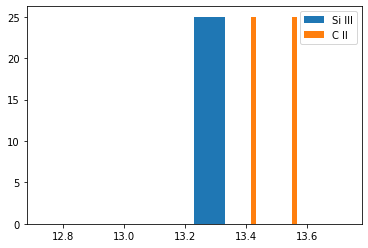

interval: [234, 264.0], Counter({'N I': 25})


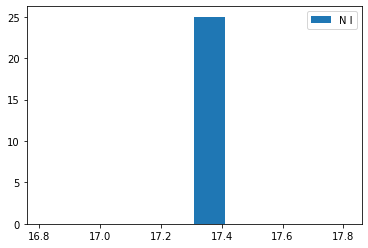

interval: [266, 270.0], Counter({'N I': 25})


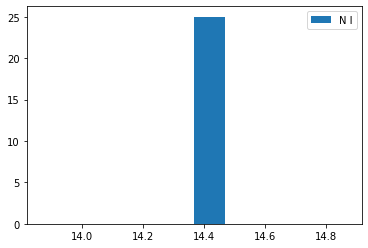

interval: [273, 276.0], Counter({'N I': 25})


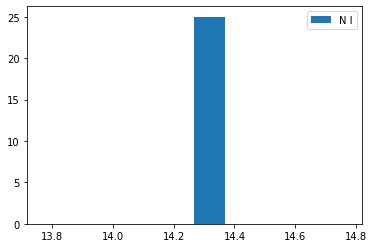

interval: [277, 279.0], Counter({'N I': 25})


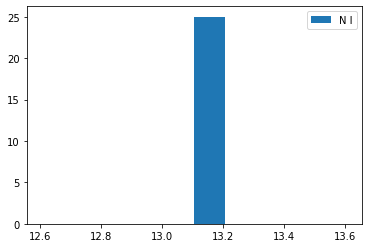

In [124]:
for interval in index_list:
    df = master_df[(master_df['interval_start'] >= interval[0]) & (master_df['interval_end'] <= interval[1])]
    name_list=[]
    for name in df['name']:
        name_list.append(name)
    print(f"interval: {interval}, {collections.Counter(name_list)}")
    df.reset_index(inplace=True)
    plt.figure()
    hist_plot(df, 'col_dens')
    plt.show()
    

In [118]:
test_df = master_df[(master_df['interval_start'] >= 100) & (master_df['interval_end'] <= 150)]
name_list = []
for name in test_df['name']:
    name_list.append(name)

print(collections.Counter(name_list))
test_df.reset_index(inplace=True)

test_df

Counter({'O VI': 25})


,level_0,index,name,wave,redshift,col_dens,delta_v,vel_dispersion,interval_start,interval_end,density,temperature,metallicity,lightray_index
0,0,48,O VI,1031.912,0.0,13.256224,117.556132,11.379019,102,132.0,5.448518e-29,136130.406452,1.096768,62.0
1,17,48,O VI,1031.912,0.0,13.256224,117.556132,11.379019,102,132.0,5.448518e-29,136130.406452,1.096768,62.0
2,34,48,O VI,1031.912,0.0,13.256224,117.556132,11.379019,102,132.0,5.448518e-29,136130.406452,1.096768,62.0
3,51,48,O VI,1031.912,0.0,13.256224,117.556132,11.379019,102,132.0,5.448518e-29,136130.406452,1.096768,62.0
4,68,48,O VI,1031.912,0.0,13.256224,117.556132,11.379019,102,132.0,5.448518e-29,136130.406452,1.096768,62.0
5,85,48,O VI,1031.912,0.0,13.256224,117.556132,11.379019,102,132.0,5.448518e-29,136130.406452,1.096768,62.0
6,102,48,O VI,1031.912,0.0,13.256224,117.556132,11.379019,102,132.0,5.448518e-29,136130.406452,1.096768,62.0
7,119,48,O VI,1031.912,0.0,13.256224,117.556132,11.379019,102,132.0,5.448518e-29,136130.406452,1.096768,62.0
8,136,48,O VI,1031.912,0.0,13.256224,117.556132,11.379019,102,132.0,5.448518e-29,136130.406452,1.096768,62.0
9,153,48,O VI,1031.912,0.0,13.256224,117.556132,11.379019,102,132.0,5.448518e-29,136130.406452,1.096768,62.0


In [102]:
np.log(test_df['metallicity'][1])

0.23554502935036023

In [12]:
exab_df = master_df[master_df['interval_start'] >= 270]
exab_df.reset_index(inplace=True)

In [105]:
def hist_plot(absorber_df, thing_we_care_about, xleft=13.0, xright=13.6, lims=False):
    """
    FUNCTION ASSUMES ABSORBER DATAFRAME INDICES HAVE ALREADY BEEN RESET TO START AT 0!!
    """
    dic = {}
    for index in range(len(absorber_df)):
        if index == 0:
            dic[f"{absorber_df['name'][index]}"] = []
        else:
            if absorber_df['name'][index] == absorber_df['name'][index-1]:
                pass
            else:
                dic[f"{absorber_df['name'][index]}"] = []
                
    for ion in dic:
        for index in range(len(absorber_df)):
            if absorber_df['name'][index] == ion:
                dic[ion].append(absorber_df[thing_we_care_about][index])
#         print(dic[ion])
        plt.hist(dic[ion], label=ion)
        if lims is not False:
            plt.xlim(xleft, xright)
    plt.legend()
    
    return dic

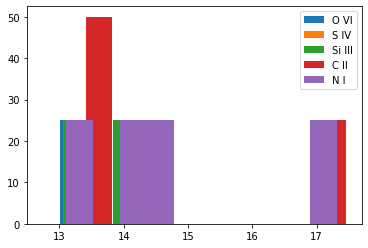

In [117]:
dic=hist_plot(test_df, 'col_dens')

In [36]:
exab_df

,level_0,index,name,wave,redshift,col_dens,delta_v,vel_dispersion,interval_start,interval_end,density,temperature,metallicity,lightray_index
0,2,50,O VI,1031.912,0.0,13.014119,28.458097,4.542708,373,384.0,6.747835e-29,147046.849246,0.990883,62.0
1,3,33,S IV,657.319,0.0,13.230478,79.519514,10.709882,351,365.0,7.324890e-28,57315.650838,1.047665,62.0
2,7,65,Si III,1206.500,0.0,14.602059,123.901186,19.528329,284,357.0,1.909405e-27,36490.546034,1.023064,62.0
3,8,66,Si III,1206.500,0.0,13.229981,74.420823,7.051533,357,365.0,5.836895e-28,62890.532012,0.999273,62.0
4,11,67,C II,903.962,0.0,13.416643,80.801741,2.311282,357,362.0,6.194651e-28,62804.620204,1.021399,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,416,66,Si III,1206.500,0.0,13.229981,74.420823,7.051533,357,365.0,5.836895e-28,62890.532012,0.999273,62.0
196,419,67,C II,903.962,0.0,13.416643,80.801741,2.311282,357,362.0,6.194651e-28,62804.620204,1.021399,62.0
197,420,68,C II,903.962,0.0,13.566764,69.545995,4.987326,362,365.0,5.601389e-28,62947.086654,0.984707,62.0
198,423,39,N I,1200.223,0.0,14.268223,177.483101,0.326953,273,276.0,9.303977e-26,9878.567235,1.049180,62.0


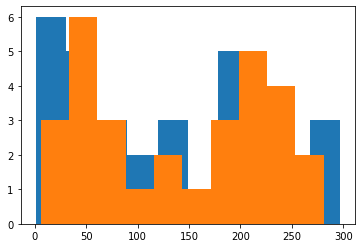

In [49]:
x = np.random.randint(1, 300, size=(30, 2))
for column in range(2):
    plt.hist(x[:,column])

In [33]:
x[:,0]

array([ 34, 121, 195,  23,  25, 268,   5,   3, 223,  53, 100,  19, 185,
        13, 215, 206, 278, 225, 284,  35,  43, 204, 293,  41, 121, 223,
        24,  37, 285, 237, 143,  58, 190, 287, 138, 190, 257,  98, 289,
       273, 181, 117,  30, 182,  63,  37, 141,  90, 144,  60, 120,  91,
         2, 261,  22, 296, 220,  92, 229, 288,  96, 164, 222, 253, 199,
       281, 130, 292, 258,  85, 229,  59,  45, 230, 193, 248, 210, 290,
        43, 122, 147, 139,  12, 156,  50, 101,  41, 237, 262, 136,  76,
       113, 295,  84, 267,  82, 282, 245,  38,  98, 256, 272,  26, 215,
       286,  33, 106,  29, 174, 103, 154, 124, 248, 203, 185, 146, 157,
         1, 174, 124,  62, 224,  85,  70,   8, 282, 169, 171,  51,  87,
       175,  37, 207,  38,   4,   7, 218,   8, 160, 201, 283, 243, 145,
        81, 130, 240,  24, 111, 145, 175,  10, 160, 185,  31, 168,  84,
       101, 126,  83, 201, 271,  83, 258, 152,  92, 296,  14, 277, 236,
        62, 183,  71, 206,   5,  72, 230, 124, 197, 299, 129,  9

In [56]:
for ion in dic:
    print(ion)
    print(f"count for {ion}: {collections.Counter(dic[ion])}")

O VI
count for O VI: Counter({13.01411912029068: 25})
S IV
count for S IV: Counter({13.230478175763572: 25})
Si III
count for Si III: Counter({14.602059461042748: 25, 13.229981355750704: 25})
C II
count for C II: Counter({13.416643013540847: 25, 13.566763884599036: 25})
N I
count for N I: Counter({14.268223120525988: 25, 13.106109427779348: 25})
